<div style="border:solid green 3px; padding: 20px">
																					
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование экономической выгоды от пользователей с подпиской по месяцам и пользователей без подписки

В нашем распоряжении данные сервиса аренды самокатов GoFast -  данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
    
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

3130 метров — оптимальное с точки зрения износа самоката. Проверим среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает ли оно 3130 метров? 

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Проверим, снизилось ли колисество обращений в техническую поддержку после обновления сервера, с которым взаимодействует мобильное приложение. 


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здорово, что ты оставляешь описание задачи. Это поможет тебе быстро вспомнить о чем проект, если спустя время ты решишь к нему вернуться)
</div>

In [1]:
#Загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as st
from math import factorial
from scipy.stats import binom, norm


#зададим стили для графиков
sns.set_theme(style="white", palette="Set2")
plt.style.use('seaborn-whitegrid')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что импортируешь все библиотеки отдельно в первой ячейке. Это правило хорошего тона, которое позволит твоим коллегам сразу увидеть все необходимые библиотеки для работы с твоим файлом.
</div>

### Знакомство с данными

In [2]:
# откроем датасеты
try:
    users = pd.read_csv('files/users_go.csv') # информация о пользователях
    rides = pd.read_csv('files/rides_go.csv') # информация о поездках
    subscriptions = pd.read_csv('files/subscriptions_go.csv') # данные о подписках
except:
    users = pd.read_csv('/datasets/users_go.csv') # информация о пользователях
    rides = pd.read_csv('/datasets/rides_go.csv') # информация о поездках
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv') # данные о подписках
    
pd.set_option("display.max_columns", None)

print('Пользователи')
display(users.head(5))
print('Поездки')
display(rides.head(5))
print('Подписка')
display(subscriptions.head(5))

Пользователи


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Поездки


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Подписка


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b>
<br>Если ты работаешь локально, то следует указывать два пути к файлам через конструкцию try...except...
<br>Поправь, пожалуйста, чтобы я смог проверить твой проект. На всякий случай приложу пути к файлам на платформе
    
    /datasets/users_go.csv
	  /datasets/rides_go.csv
	  /datasets/subscriptions_go.csv
</div>


<div class="alert alert-info">
<b>Илья, привет!</b>
<br>Про конструкцию try...except... учту на будущее, но к сожалению она меня в дальнейшем не спасет. 
    
    Вылезают другие несовместимости, которые кроме как прогнав в тетради не увидеть/поправить. 
    В этот раз в конструкции 
    
    
    ax_2 = sns.histplot(users, 
                    x='subscription_type', 
                    stat = 'percent', shrink=.9 )
    
    
    
    не понравился stat = 'percent', хотя в документации к библиотеке 'percent' можно и на локальном работало. 
    Задала вопрсо в группе, как правильно загружать проект, чтобы прогнать его перед оптавкой, пока не ответили...
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Теперь всё работает) Перехожу к проверке!
</div>

In [3]:
# Общая информация о наборе данных, индекс, столбцы и тип данных, нулевые значения и использование памяти
print("Пользователи \n")
print(users.info())

print('*'*60, '\n')

print('Поездки \n')
print(rides.info())

print('*'*60, '\n')

print('Подписка \n')
print(subscriptions.info())

Пользователи 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
************************************************************ 

Поездки 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
**********

In [4]:
# Оценим количество пропущенных значений в каждом столбце
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [5]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [6]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

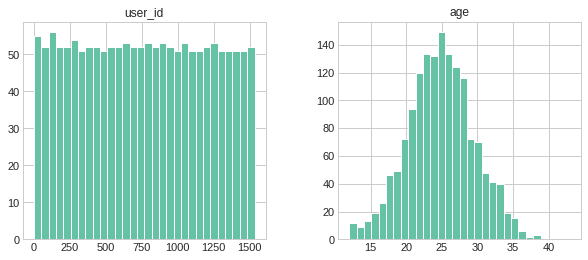

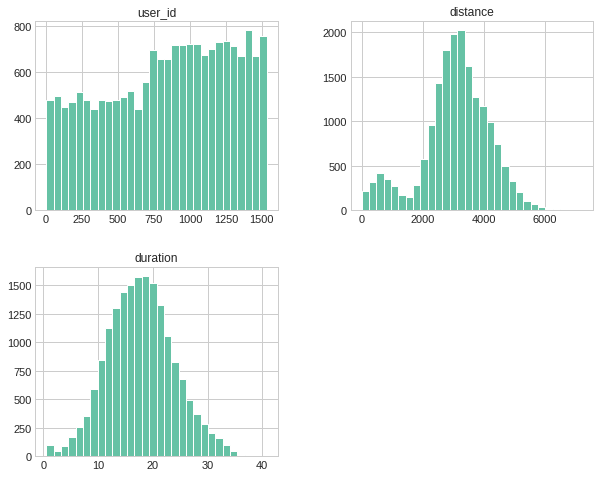

In [7]:
# Визуализируем общие данные

users.hist(figsize=(10, 4), bins= 30)
rides.hist(figsize=(10, 8), bins= 30)

Общая предварительная оценка данных:

- набор данных достаточен для анализа
- пропуски отсутсвуют
- присутсвуют неправильные типы данных

Выборка репрезентативна.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Первичный анализ данных выполнен верно. Можем переходить к следующему этапу)
</div>

###  Предобработка данных

#### Удаление дубликатов

In [8]:
rides.duplicated().sum()

0

In [9]:
users.duplicated().sum()

31

In [10]:
# Удалими явные дубликаты в датасете users
users = users.drop_duplicates(keep = 'first')
users.duplicated().sum()

0

In [11]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

- явные дубликаты удалены 
- неявные дубликаты отсутсвуют

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Проверка на дубликаты выполнена!
</div>

####  Изменение типа данных

Переведем в формат времени значение столбца date в датафрейме rides

In [12]:
rides['date_of_ride'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       18068 non-null  int64         
 1   distance      18068 non-null  float64       
 2   duration      18068 non-null  float64       
 3   date          18068 non-null  object        
 4   date_of_ride  18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 705.9+ KB


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Тип данных изменён верно! 
</div>
				
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если при загрузке данных добавить параметр parse_dates: parse_dates=['date'] то список столбцов автоматически переведется в даты. Подробнее про это можно прочитать по ссылке ниже
				
	https://newtechaudit.ru/gruzi-daty-krasivo/
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо за ценный совет! Запомню!
</div>

####  Добавление новых столбцов

In [13]:
# Добавим столбец c месяцем поездки
rides['month'] = pd.DatetimeIndex(rides['date_of_ride']).month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       18068 non-null  int64         
 1   distance      18068 non-null  float64       
 2   duration      18068 non-null  float64       
 3   date          18068 non-null  object        
 4   date_of_ride  18068 non-null  datetime64[ns]
 5   month         18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 847.1+ KB


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Новый столбец создан верно!
</div>

In [14]:
rides.head()

,user_id,distance,duration,date,date_of_ride,month
0,1,4409.919140,25.599769,2021-01-01,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,2021-08-28,8


### Исследовательский анализ данных

Посмотрим на статистику выборки:

In [15]:
users.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


In [16]:
rides.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


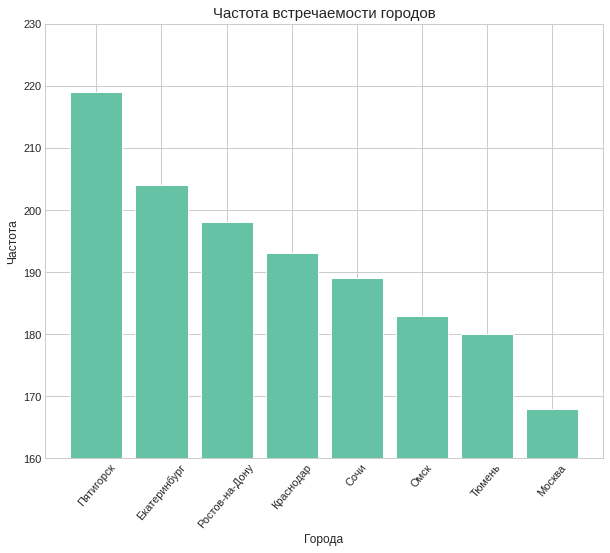

In [17]:
# Частота встречаемости городов
city_plot = users['city'].value_counts()



fig = plt.figure(figsize = (10,8))
ax_1 = fig.add_subplot(1,1,1) 
plt.bar(x=city_plot.index, height=city_plot.values)
ax_1.set_title('Частота встречаемости городов', fontsize = 15)
ax_1.set_xlabel('Города') 
ax_1.set_ylabel('Частота')
ax_1.grid(True)
ax_1 = plt.xticks(rotation = 50)
ax_1 = plt.ylim(160, 230)

plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Молодец, что подписываешь график и его оси. Не забывай добавлять сортировку
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Илья, подскажи пожалуйста, есть ли какие-то приемы, чтобы добавить сортировку по возрастанию/ убыванию для гистограмм?
Ковырялась почти час, в итоге добилась нужного вида графика, но только через bar.
</div>

- Больше всего поездок в Пятигорске
- Меньше всего в Москве

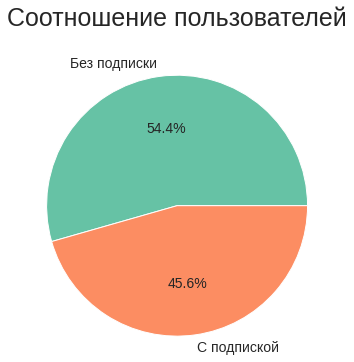

In [18]:
# Соотношение пользователей с подпиской и без подписки 
fig, ax = plt.subplots()

labels = ['Без подписки','С подпиской']
ax.pie(users['subscription_type'].value_counts(), 
       labels= labels , 
       autopct='%1.1f%%', 
       radius = 1.5, 
       textprops={'fontsize': 14})
ax.set_title('Соотношение пользователей', fontsize = 25, y = 1.3)
plt.show()

- Пользователей <u>без подписки</u> больше.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Для того чтобы посмотреть соотношение пользователей нужно отобразить долю каждой группы. Для этого хорошо пойдет круговая диаграмма
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Готово.
</div>

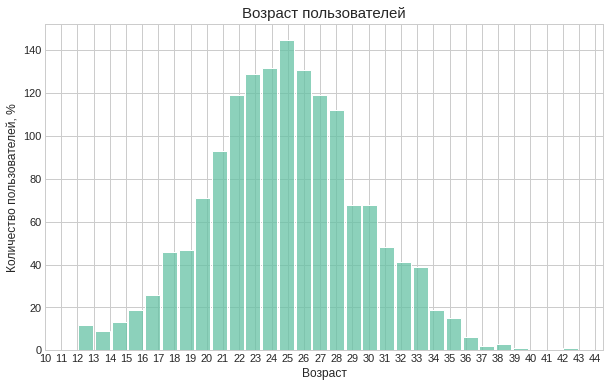

In [19]:
# Возраст пользователей

fig = plt.figure(figsize = (10,6)) # задаем размер изображения
ax_3 = sns.histplot(users, x='age', shrink=.9)
ticks = []
for i in range (10,45):
    ticks.append(i)
ax_3.set_xticks(ticks)
ax_3.set_title('Возраст пользователей', fontsize= 15)
ax_3.set_xlabel('Возраст') 
ax_3.set_ylabel('Количество пользователей, %')
ax_3.grid(True)

plt.show()

In [20]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

- Возраст пользователей от 12 до 43 лет
- Мода - 25 лет

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>В данном случае после графика ещё можно использовать метод describe() для этого столбца. Так мы сможем увидеть расчет описательных статистик
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
ок!
</div>

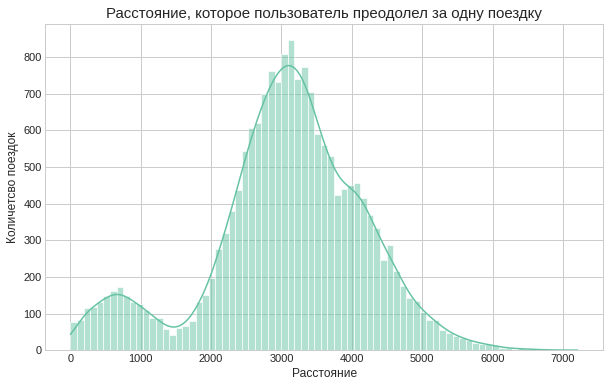

In [21]:
# Расстояние, которое пользователь преодолел за одну поездку;
fig = plt.figure(figsize = (10,6)) # задаем размер изображения 
ax_4 = sns.histplot(rides, x='distance', kde=True)
ax_4.set_title('Расстояние, которое пользователь преодолел за одну поездку', fontsize = 15)
ax_4.set_xlabel('Расстояние') 
ax_4.set_ylabel('Количетсво поездок')
ax_4.grid(True)
plt.show()

- Среднее расстояние поездки в районе 3км


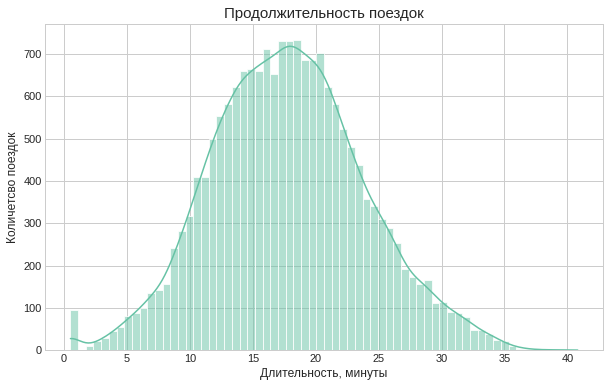

In [22]:
# Продолжительность поездок.

fig = plt.figure(figsize = (10,6)) # задаем размер изображения
ax_5 = sns.histplot(rides, x='duration', kde=True)
ax_5.set_title('Продолжительность поездок', fontsize= 15)
ax_5.set_xlabel('Длительность, минуты') 
ax_5.set_ylabel('Количетсво поездок')
ax_5.grid(True)

plt.show()

- Продолжительность поездок до 40 минут
- Среднее время 17 минут
- Пик около нуля (очень короткие поездки), скорее всего, говорит от технической неисправности и быстром завершении.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Графики и выводы корректные
</div>

### Объединение данных


In [23]:
data = users.merge(rides, how = 'outer', left_on = 'user_id', right_on = 'user_id' )
data = data.merge(subscriptions, how = 'outer', left_on = 'subscription_type', right_on = 'subscription_type')
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,date_of_ride,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,2021-11-22,11,6,0,199


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  object        
 8   date_of_ride       18068 non-null  datetime64[ns]
 9   month              18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory 

Все три таблицы объединены в одну. 

Таблицы users и rides 'склеены' по user_id. 

Далее полученая таблица дополнена из таблицы subscriptions по столбцу subscription_type

In [25]:
# Из общего датасета выделим отдельно пользователей без подписки
data_free = data.query('subscription_type == "free"')
data_free['subscription_type'].unique()

array(['free'], dtype=object)

In [26]:
data_free.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


In [27]:
# Из общего датасета выделим отдельно пользователей с подпиской
data_ultra = data.query('subscription_type =="ultra"')
data_ultra['subscription_type'].unique()

array(['ultra'], dtype=object)

In [28]:
data_ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


data_free - датасет с информацией о пользователях без подписки

data_ultra - датасет с информацией о пользователях с подпиской

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Новые таблицы созданы верно
</div>

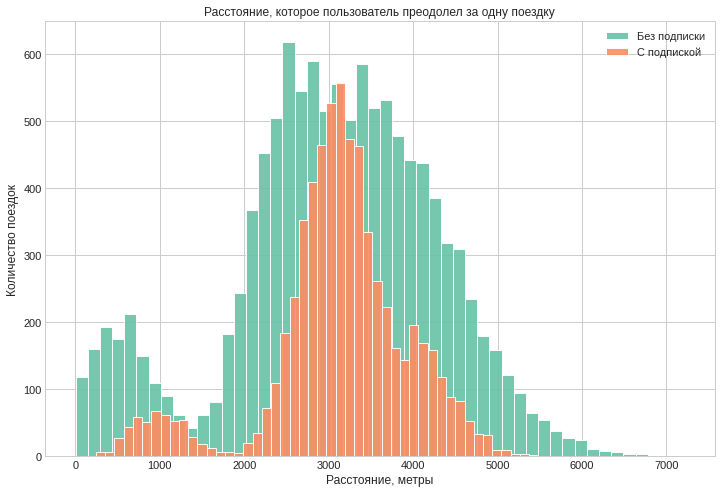

In [29]:
# Расстояние, которое пользователь преодолел за одну поездку;
plt.figure(figsize = (12,8))
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество поездок')
plt.hist(data_free['distance'],bins= 50, alpha=0.9, label='Без подписки')
plt.hist(data_ultra['distance'], bins= 50, alpha=0.9, label='С подпиской')

# Добавляем легенду и выводим график на экран
plt.legend()
plt.show()


- Значения среднего расстояние для пользователей с подпиской и без совпадают
- Однако стандартное отклонение для пользователей без подписки выше.

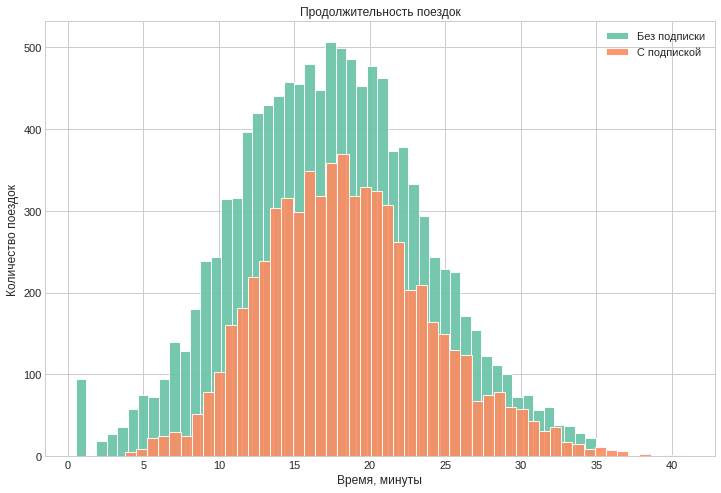

In [30]:
# Продолжительность поездок пользователей с подпиской и без;
plt.figure(figsize = (12,8))
plt.title('Продолжительность поездок')
plt.xlabel('Время, минуты')
plt.ylabel('Количество поездок')
plt.hist(data_free['duration'],bins= 50, alpha=0.9, label='Без подписки')
plt.hist(data_ultra['duration'], bins= 50, alpha=0.9, label='С подпиской')

# Добавляем легенду и выводим график на экран
plt.legend()
plt.show()


- Пик около нуля для пользователей без подписки скорее говорит о тех. проблемах с самокатом.
- Пользователи без подписки чаще используют самокаты на более короткое время

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Ты правильно делаешь, что совмещаешь оба графика, так их проще сравнить друг с другом
</div>

### Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе data с объединёнными данными.
Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Важно округлить длительность каждой поездки перед агрегацией данных по месяцам, так как это может повлиять на суммарную продолжительность поездок
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
Хмм. Действительно, об этом было сказано в описании к проекту. Исправила.
</div>

In [42]:
data['duration'] =  np.ceil(data['duration']) 
data_amount = pd.pivot_table(data, 
                             index=['user_id','month', 'subscription_type', 'minute_price',	'start_ride_price',	'subscription_fee'] , 
                             values=['distance', 'duration', 'city'], 
                             aggfunc={'distance': "sum", 'city': "count", 'duration': "sum"}).reset_index()
data_amount = data_amount.rename(columns={'city': 'quantity', 
                                          'distance': 'distance_amount',
                                          'duration': 'duration_amount'})
data_amount.head()

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,quantity,distance_amount,duration_amount
0,1,1,ultra,6,0,199,2,7027.511294,42.0
1,1,4,ultra,6,0,199,1,754.159807,7.0
2,1,8,ultra,6,0,199,2,6723.470560,46.0
3,1,10,ultra,6,0,199,2,5809.911100,32.0
4,1,11,ultra,6,0,199,3,7003.499363,56.0


In [32]:
data_amount.describe()

,user_id,month,minute_price,start_ride_price,subscription_fee,quantity,distance_amount,duration_amount
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,811.061160,6.477539,7.199894,29.997352,79.610537,1.594564,4896.362584,28.391223
std,440.350798,3.443928,0.979861,24.496519,97.496144,0.831604,2911.516556,16.381399
min,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,2.570787,0.500000
25%,435.000000,4.000000,6.000000,0.000000,0.000000,1.000000,2972.202146,16.758129
50%,843.000000,6.000000,8.000000,50.000000,0.000000,1.000000,3988.723985,23.573018
75%,1191.000000,9.000000,8.000000,50.000000,199.000000,2.000000,6421.375890,36.921430
max,1534.000000,12.000000,8.000000,50.000000,199.000000,7.000000,23429.487786,140.264426


Расчитаем помесячную выручку, которую принёс каждый пользователь. 

Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [33]:
data_amount['revenue'] = np.ceil(data_amount['start_ride_price']*data_amount['quantity']    
                          + data_amount['minute_price']*data_amount['duration_amount']    
                          +data_amount['subscription_fee'])
data_amount.describe()

,user_id,month,minute_price,start_ride_price,subscription_fee,quantity,distance_amount,duration_amount,revenue
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,811.061160,6.477539,7.199894,29.997352,79.610537,1.594564,4896.362584,28.391223,337.008031
std,440.350798,3.443928,0.979861,24.496519,97.496144,0.831604,2911.516556,16.381399,151.187533
min,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,2.570787,0.500000,54.000000
25%,435.000000,4.000000,6.000000,0.000000,0.000000,1.000000,2972.202146,16.758129,231.000000
50%,843.000000,6.000000,8.000000,50.000000,0.000000,1.000000,3988.723985,23.573018,315.000000
75%,1191.000000,9.000000,8.000000,50.000000,199.000000,2.000000,6421.375890,36.921430,410.000000
max,1534.000000,12.000000,8.000000,50.000000,199.000000,7.000000,23429.487786,140.264426,1423.000000


In [34]:
data_amount.head()

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,quantity,distance_amount,duration_amount,revenue
0,1,1,ultra,6,0,199,2,7027.511294,41.416640,448.0
1,1,4,ultra,6,0,199,1,754.159807,6.232113,237.0
2,1,8,ultra,6,0,199,2,6723.470560,44.776802,468.0
3,1,10,ultra,6,0,199,2,5809.911100,31.578017,389.0
4,1,11,ultra,6,0,199,3,7003.499363,53.397424,520.0


data_amount - датафрейм с агрегированными данными о поездках. 

Для каждого пользователя посчитано суммарное расстояние, количество поездок, суммарное время и доход за каждый месяц. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Выручка расчитана верно!
</div>

### Проверка гипотез

#### Гипотеза 1. Тратят ли пользователи с подпиской бошльше времени на поездки?

- Нулевая гипотеза: среднее значения времени, затраченного на поездку, пользователей с подпиской и без равны.
- Альтернативная гипотеза: среднее значение времени, затраченного на поездку, пользователей с подпиской больше, чем среднее значение времени пользователей без подписки

- Уровень статистической значимости установим на 5% (.05)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Гипотезы сформулированы верно
</div>

In [35]:
# задаём уровень значимости
alpha = 0.05

print(f"среднее время одной поездки для пользователей с подпиской {data_ultra['duration'].mean().round(2)}")
print(f"среднее время одной поездки для пользователей без подписки {data_free['duration'].mean().round(2)}")
print("-"*60)
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

среднее время одной поездки для пользователей с подпиской 18.54
среднее время одной поездки для пользователей без подписки 17.39
------------------------------------------------------------
p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Есть основания говорить, что пользователи с подпиской больше времени тратат на поездки и тем самым более выгодны для сервиса.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Вывод верный
</div>

#### Гипотеза 2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Проведем одновыборочный ttest о равенстве среднего генеральной совокупности числу 

- Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.
- Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров. 


In [43]:
interested_value = 3130 # столько метров должны проезжать пользователи с подпиской за одну поездку

alpha = 0.05 # уровень статистической значимости

print(f"Среднее расстояние за одну поездку для пользователей с подпиской {data_ultra['distance'].mean().round(2)}")
print("-"*60)
results = st.ttest_1samp(data_ultra['distance'], interested_value, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее расстояние за одну поездку для пользователей с подпиской 3115.45
------------------------------------------------------------
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В данном случае нужно использовать параметр alternative = 'greater'. Поскольку оптимальное расстояние по износу составляет 3130 м, значит большее расстояние приводит к повышенному износу самоката. Следовательно, имеет смысл сформулировать альтернативную гипотезу "Подписчики в среднем проезжают расстояние больше оптимального"
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
Исправила, но в плане понимания сложно :) Видимо, еще не раз придется вернуться к теории, чтобы пришло окончательное осознание когда и какой хвост нужен...
</div>

Согласно расчету гипотеза о том, что среднее расстояние, которое проезждают пользователи с подпиской не превышает 3130 м, не может быть опровергнута. 

#### Гипотеза 3 Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


Проведем двухвыборочный ttest для двух независимых выборок
- Нулевая гипотеза: выручка от пользователей с подпиской равна выручке от пользователей без подписки
- Альтернативная гипотеза: выручка от пользователей с подпиской  выше выручки от пользователей без попдиски.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Гипотезы сформулированы верно
</div>

In [37]:
# задаём уровень значимости
alpha = 0.05
# вынесем выборки в отдельную переменную
ultra = data_amount.query('subscription_type == "ultra"')['revenue']
free =  data_amount.query('subscription_type == "free"')['revenue']

print(f"средняя выручка от пользователей с подпиской {ultra.mean().round(2)}")
print(f"среднее выручка от пользователей без подписки {free.mean().round(2)}")

print("-"*60)

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra, free, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

средняя выручка от пользователей с подпиской 359.03
среднее выручка от пользователей без подписки 322.32
------------------------------------------------------------
p-value: 2.758832300750934e-37
Отвергаем нулевую гипотезу


Можно утверждать, что пользователи с подпиской более выгодны компании.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Вывод верный
</div>

#### Гипотеза 4. После обновления сервера количество обращений в техническую поддержку снизилось.

Для проверки данной гипотезы лучше всего провести двухвыборочный ttest для зависимых выборок

scipy.stats_ttest(rel))

- Нулевая гипотеза: количество обращений до и после обновления сервера равны.
- Альтернативная гипотеза: количество обращений после обновления сервера стало меньше.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Метод выбран верно!
</div>

### Распределения

#### Какаое количество промокодов нужно раздать, чтобы получить нужный приток пользователей с подпиской.

Задача: по завершению промомесяца 100 клиентов должны оплатить (продлить) подписку.

Известно, что с вероятностью 10% пользователь продлит подписку на следующий месяц.

Вероятность получить менее 100 новых подписчиков не должна превышать 5%

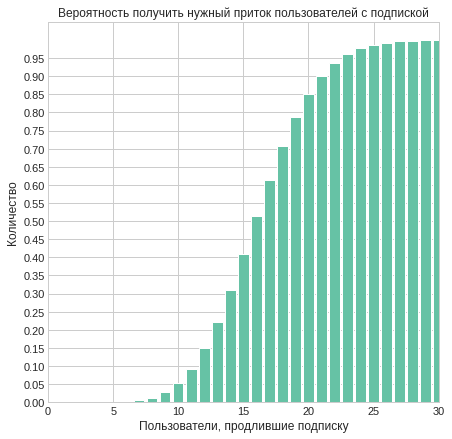

In [38]:
p = 0.1 # вероятность, что клиент продлит подписку
n = 1650 # количество промокодов на бесплатную подписку на месяц 

distr=[] # список, в котором будем хранить значения распределения
t = int(n/10)
for k in range(0, (t + 1)):
    current_value = binom.cdf(k, t, p)
    distr.append(current_value)
    
plt.figure(figsize = (7,7))
plt.title('Вероятность получить нужный приток пользователей с подпиской')
plt.xlabel('Пользователи, продлившие подписку')
plt.ylabel('Количество')
plt.bar(range(0, t + 1), distr)
ticks = []
for i in range (0,100, 5):
    
    ticks.append(i/100)
plt.yticks(ticks)
plt.xlim(0, 30)
plt.show()

In [39]:
print('Вывод:')
print('-'*60)
print(f'Чтобы с вероятностью не менее 95% получить 100 клиентов,')
print(f'продливших подписку, нужно раздать не менее {n} промокодов')

Вывод:
------------------------------------------------------------
Чтобы с вероятностью не менее 95% получить 100 клиентов,
продливших подписку, нужно раздать не менее 1650 промокодов


#### Оценить успешность рассылки

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. 
Клиенты могут открыть его или не открывать. 

- Известно, что уведомления открывают около 40 % получивших клиентов. 
- Отдел планирует разослать 1 млн уведомлений.

- С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность открыть приложение после push уведомления достаточно велика. Так что можно аппроксимировать ее нормальным распределением.


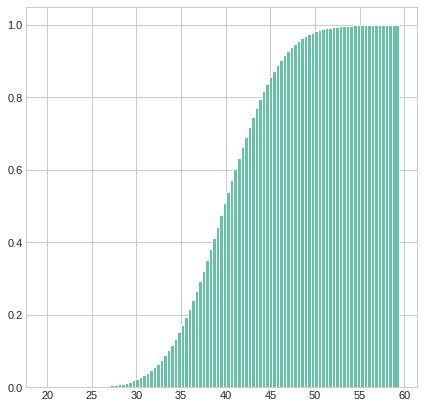

In [40]:
from math import sqrt

# задаём параметры биномиального распределения
n = 1000000
p = 0.4
t=int(n/10000)
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = t * p
sigma = sqrt(t * p * (1 - p))


# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)

left = int(t * p - 4 * sqrt(t * p * (1 - p)))
right = int(t * p + 4 * sqrt(t * p * (1 - p)))
x = linspace(left, right, 100)
# задаём нормальное распределение
distr = norm.cdf(x, mu, sigma) 

plt.figure(figsize = (7,7))

plt.bar(x, distr)

plt.show()


In [41]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4
x = 399500 # желаемая величина
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от x
result = distr.cdf(x)
print(f'Вероятность получить не более 399.5 тыс. пользователей - {(result*100).round(2)} %')

Вероятность получить не более 399.5 тыс. пользователей - 15.37 %


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Дополнительное задание выполнено верно!
</div>

### Выводы

Для проведения исследования была получена выборка из генеральной совокупности, а именно данные о некоторых пользователях сервиса проката самокатов GoFast

- Набор данных достаточен для анализа
- Выборка репрезентативна.

В ходе предобработки данных:
- удалены явные дубликаты (31шт)
- в формат времени переведено значение столбца date в датафрейме rides
- добавлен столбец с месяцем поездки

В ходе исследовательского анализа данных было установлено:

- Средний возраст пользователей 25 лет
- Диапазон от 12 до 43 лет
- Среднее расстояние 3133.6 метров, расстояние не превышает 6 км
- Средняя продолжительность поездки 17,6 мин, максимальное значение не превышает 40 минут
- Больше всего поездок в Пятигорске, меньше всего в Москве
- Пользователей без подписки больше

Для проверки гипотез был создан отдельный датафрейм с суммарным расстоянием, количество поездок и суммарным временем для каждого пользователя за каждый месяц.

В ходе проверки гипотез были получены следующие выводы:

- Пользователи с подпиской больше времени тратат на поездки и тем самым более выгодны для сервиса.
- Можно утверждать, что среднее расстояние за одну поездку для пользователей с подпиской не превышает 3130 метров.
- Выручка от пользователей с подпиской выше выручки от пользователей без попдиски.
- Чтобы проверить гипотезу, что после обновления сервера количество обращений в техническую поддержку снизилось нужно провести двухвыборочный ttest для зависимых выборок scipy.stats_ttest(rel)) 

На основании распределений:

- Чтобы с вероятностью не менее 95% получить 100 клиентов, продливших подписку, нужно раздать не менее 1650 промокодов

- Вероятность получить не более 399.5 тыс. откликов - 15.37 % при рассылке в 1млн.

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- отобразить долю каждой группы пользователей
<br>- провести округление до агрегации по месяцам
<br>- корректно проверить вторую гипотезу

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> ✔️ Кажется, все поправила.
</div>